<a href="https://colab.research.google.com/github/Lucas-CardosoO/android-emulator-detector/blob/feat%2Fnotebook_analysis/notebooks/EmulatorAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Android Emulator detection

## Handling files and uploading

This loads the logs from my Drive, real device logs are not provided due to privacy reasons.

The files are loaded on the tmp folder.

In [1]:
!rm -rf /tmp/logs
!mkdir /tmp/logs
!cp -r /content/drive/MyDrive/TCC/Notebook\ Data/Logs/ /tmp/logs

In [2]:
cd /tmp/logs/Logs

/tmp/logs/Logs


In [3]:
import os

all_subdirs = [d for d in os.listdir('.') if os.path.isdir(d)]
all_subdirs

['User Logs', 'Bluestacks', 'Nox', 'Genymotion', 'Android Studio']

Extracting zip files.

In [4]:
import zipfile

extension = ".zip"
for dir in all_subdirs:
  for item in os.listdir(dir):
    if item.endswith(extension):
      path = dir + "/" + item
      new_path = (str(path)).replace(extension, "")
      abs_path = os.path.abspath(new_path)
      os.makedirs(abs_path)
      zip_ref = zipfile.ZipFile(path)
      zip_ref.extractall(abs_path)
      zip_ref.close()
      os.remove(path)

# Loading logs as Dataframes

Defining helper functions

In [5]:
import pandas as pd

def get_dataframe_from_dir(dir):
  file_name = "log_0.tsv"
  df = pd.DataFrame({'descriptions': pd.Series(dtype='str'),'collected_data': pd.Series(dtype='str'),'emulator_detected': pd.Series(dtype='bool'),'collection_duration': pd.Series(dtype='int')})
  for item in os.listdir(dir):
    new_df = pd.read_csv(dir + "/" + item + "/" + file_name, sep = '\t')
    df = df.append(new_df, ignore_index=True)
  return df

def log_count(dir):
  return len(os.listdir(dir))

vectorization_label = 'Vectorization'

def fix_vectorization_description(row):
  if row.loc['descriptions'] == 'isEmu vectorization detection. isEmu may be -1 if running on unsupported hardware':
    return vectorization_label
  else:
    return row.loc['descriptions']

is_emulator_label = 'is_emulator'

In [6]:
bluestacks_df = get_dataframe_from_dir("Bluestacks")
bluestacks_df['descriptions'] = bluestacks_df.apply(lambda row: fix_vectorization_description(row), axis=1)
bluestacks_df[is_emulator_label] = True
bluestacks_log_count = log_count("Bluestacks")
display(bluestacks_df)

,descriptions,collected_data,emulator_detected,collection_duration,is_emulator
0,Vectorization,"{ABI=x86_64, isEmu=-1}",False,4,True
1,Build data (Basic),"{osVersion=25, model=ONEPLUS A5000, fingerprin...",False,4,True
2,Emulator files,{},False,5,True
3,Quemu known drivers,{},False,2,True
4,QEmuProps,{},False,1,True
...,...,...,...,...,...
75,External File,{Name=/storage/emulated/0/windows/BstSharedFol...,True,4,True
76,Build data (Paper),"{osVersion=25, model=ONEPLUS A5000, fingerprin...",True,0,True
77,Check Telephony Framgia,"{Phone Number=, Device ID=567294909334509, Net...",False,18,True
78,Open GL,{openGLRender=Adreno (TM) 540},False,38,True


In [7]:
android_studio_df = get_dataframe_from_dir("Android Studio")
android_studio_df['descriptions'] = android_studio_df.apply(lambda row: fix_vectorization_description(row), axis=1)
android_studio_df[is_emulator_label] = True
android_studio_log_count = log_count("Android Studio")
display(android_studio_df)

,descriptions,collected_data,emulator_detected,collection_duration,is_emulator
0,Vectorization,"{ABI=x86_64, isEmu=-1}",False,35,True
1,Build data (Basic),"{osVersion=30, model=sdk_gphone_x86_64, finger...",False,3,True
2,Emulator files,{pipes=[/dev/qemu_pipe]},True,76,True
3,Quemu known drivers,{},False,38,True
4,QEmuProps,{},False,84,True
...,...,...,...,...,...
75,External File,{Name=/storage/emulated/0/windows/BstSharedFol...,False,5,True
76,Build data (Paper),"{osVersion=30, model=sdk_gphone_x86_64, finger...",True,0,True
77,Check Telephony Framgia,"{Phone Number=+15555215554, Device ID=null, Ne...",True,231,True
78,Open GL,{openGLRender=Android Emulator OpenGL ES Trans...,True,80,True


In [8]:
genymotion_df = get_dataframe_from_dir("Genymotion")
genymotion_df['descriptions'] = genymotion_df.apply(lambda row: fix_vectorization_description(row), axis=1)
genymotion_df[is_emulator_label] = True
genymotion_log_count = log_count("Genymotion")
display(genymotion_df)

,descriptions,collected_data,emulator_detected,collection_duration,is_emulator
0,Vectorization,"{ABI=x86, isEmu=-1}",False,19,True
1,Build data (Basic),"{osVersion=28, model=Google Nexus 4, fingerpri...",True,2,True
2,Emulator files,"{x86=[fstab.vbox86, init.vbox86.rc, ueventd.vb...",False,2,True
3,Quemu known drivers,{},False,44,True
4,QEmuProps,{},False,9,True
...,...,...,...,...,...
75,External File,{Name=/storage/emulated/0/windows/BstSharedFol...,False,3,True
76,Build data (Paper),"{osVersion=28, model=Google Nexus 4, fingerpri...",True,0,True
77,Check Telephony Framgia,"{Phone Number=15555218135, Device ID=000000000...",True,112,True
78,Open GL,{openGLRender=Android Emulator OpenGL ES Trans...,True,201,True


In [9]:
nox_df = get_dataframe_from_dir("Nox")
nox_df['descriptions'] = nox_df.apply(lambda row: fix_vectorization_description(row), axis=1)
nox_df[is_emulator_label] = True
nox_log_count = log_count("Nox")
display(nox_df)

,descriptions,collected_data,emulator_detected,collection_duration,is_emulator
0,Vectorization,"{ABI=x86, isEmu=-1}",False,11,True
1,Build data (Basic),"{osVersion=25, model=SM-G930L, fingerprint=sam...",False,6,True
2,Emulator files,{},False,2,True
3,Quemu known drivers,{},False,11,True
4,QEmuProps,{},False,2,True
...,...,...,...,...,...
75,External File,{Name=/storage/emulated/0/windows/BstSharedFol...,False,16,True
76,Build data (Paper),"{osVersion=25, model=SM-G930L, fingerprint=sam...",True,0,True
77,Check Telephony Framgia,"{Phone Number=13812582808, Device ID=864394020...",False,42,True
78,Open GL,{openGLRender=Adreno (TM) 640},False,15,True


In [10]:
real_devices_df = get_dataframe_from_dir("User Logs")
real_devices_df['descriptions'] = real_devices_df.apply(lambda row: fix_vectorization_description(row), axis=1)
real_devices_df[is_emulator_label] = False
real_devices_log_count = log_count("User Logs")
display(real_devices_df)

,descriptions,collected_data,emulator_detected,collection_duration,is_emulator
0,Vectorization,"{ABI=arm64-v8a, isEmu=0}",False,3,False
1,Build data (Basic),"{osVersion=27, model=MI PLAY, fingerprint=xiao...",False,3,False
2,Emulator files,{},False,5,False
3,Quemu known drivers,{},False,2,False
4,QEmuProps,{},False,2,False
...,...,...,...,...,...
123,External File,{Name=/storage/emulated/0/windows/BstSharedFol...,False,3,False
124,Build data (Paper),"{osVersion=27, model=MI PLAY, fingerprint=xiao...",True,1,False
125,Check Telephony Framgia,{Collection Failed=No READ_PHONE_STATE Permiss...,False,2,False
126,Open GL,{openGLRender=PowerVR Rogue GE8320},False,17,False


In [11]:
total_log_count = bluestacks_log_count + android_studio_log_count + nox_log_count + genymotion_log_count + real_devices_log_count
total_log_count

total_df = pd.concat([bluestacks_df, android_studio_df, nox_df, genymotion_df, real_devices_df], ignore_index=True)
display(total_df)

,descriptions,collected_data,emulator_detected,collection_duration,is_emulator
0,Vectorization,"{ABI=x86_64, isEmu=-1}",False,4,True
1,Build data (Basic),"{osVersion=25, model=ONEPLUS A5000, fingerprin...",False,4,True
2,Emulator files,{},False,5,True
3,Quemu known drivers,{},False,2,True
4,QEmuProps,{},False,1,True
...,...,...,...,...,...
443,External File,{Name=/storage/emulated/0/windows/BstSharedFol...,False,3,False
444,Build data (Paper),"{osVersion=27, model=MI PLAY, fingerprint=xiao...",True,1,False
445,Check Telephony Framgia,{Collection Failed=No READ_PHONE_STATE Permiss...,False,2,False
446,Open GL,{openGLRender=PowerVR Rogue GE8320},False,17,False


# Log Analysis

In [12]:
import json

def emulator_detected_data_frame(data_frame, total_count): 
  emu_true = data_frame[data_frame['emulator_detected']]
  emu_true = emu_true['descriptions'].value_counts().to_frame(name = 'detection_count')
  emu_true['log_count'] = total_count
  emu_true['detection_percentage'] = emu_true['detection_count']/emu_true['log_count'] * 100
  return emu_true

def log_map_to_dict(log_map):
  return json.loads(log_map.replace("{", "{\"").replace("=", "\":\"").replace(", ", "\",\"").replace("\"[", "[\"").replace("]\"", "\"]").replace("}", "\"}"))

## Total devices

In [13]:
total_detected_methods = emulator_detected_data_frame(total_df, total_log_count)
total_detected_methods

,detection_count,log_count,detection_percentage
Build data (Paper),28,28,100.000000
Check Telephony,10,28,35.714286
Check Telephony Framgia,10,28,35.714286
Open GL,10,28,35.714286
External File,5,28,17.857143
Emulator files,5,28,17.857143
Build data (Basic),5,28,17.857143
Check Installed Packages,5,28,17.857143


All buil data detection from the paper is being marked as true. Investigating the reason. The detection heuristic is the following:

```
    private fun checkPaper(): Boolean {
        return Build.BOARD == "unknown" || Build.BRAND == "generic" || Build.DEVICE == "generic" ||
                Build.FINGERPRINT.startsWith("generic") || Build.HARDWARE == "goldfish" ||
                Build.ID == "FRF91" || Build.MANUFACTURER == "unknown" || Build.MODEL == "sdk" ||
                Build.PRODUCT == "sdk" || Build.RADIO == "unknown" || Build.SERIAL == "null" ||
                Build.TAGS == "test-keys" || Build.USER == "android-build"
    }
```



In [14]:
def build_paper_reasons_dict(log_dict):
  reason_dict = {}
  if log_dict['board'] == 'unknown':
    reason_dict['board'] = log_dict['board']
  if log_dict['brand'] == 'generic':
    reason_dict['brand'] = log_dict['brand']
  if log_dict['device'] == 'generic':
    reason_dict['device'] = log_dict['device']
  if log_dict['fingerprint'].startswith('generic'):
    reason_dict['fingerprint'] = log_dict['fingerprint']
  if log_dict['hardware'] == 'goldfish':
    reason_dict['hardware'] = log_dict['hardware']
  if log_dict['id'] == 'FRF91':
    reason_dict['id'] = log_dict['id']
  if log_dict['manufacturer'] == 'unknown':
    reason_dict['manufacturer'] = log_dict['manufacturer']
  if log_dict['model'] == 'sdk':
    reason_dict['model'] = log_dict['model']
  if log_dict['product'] == 'sdk':
    reason_dict['product'] = log_dict['product']
  if log_dict['radio'] == 'unknown':
    reason_dict['radio'] = log_dict['radio']
  if log_dict['serial'] == 'null':
    reason_dict['serial'] = log_dict['serial']
  if log_dict['tags'] == 'test-keys':
    reason_dict['tags'] = log_dict['tags']
  if log_dict['user'] == 'android-build':
    reason_dict['user'] = log_dict['user']
  return reason_dict

def calculate_reason_dict_from_dict(row, function_from_dict):
  log_dict = log_map_to_dict(str(row.loc['collected_data']))
  return function_from_dict(log_dict)

investigation_df = total_df[total_df['descriptions'] == 'Build data (Paper)']
investigation_df['reason'] = investigation_df.apply(lambda row: str(calculate_reason_dict_from_dict(row, build_paper_reasons_dict)), axis=1)
investigation_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,descriptions,collected_data,emulator_detected,collection_duration,is_emulator,reason
12,Build data (Paper),"{osVersion=25, model=ONEPLUS A5000, fingerprin...",True,0,True,{'radio': 'unknown'}
28,Build data (Paper),"{osVersion=25, model=ONEPLUS A5000, fingerprin...",True,1,True,{'radio': 'unknown'}
44,Build data (Paper),"{osVersion=25, model=ONEPLUS A5000, fingerprin...",True,2,True,{'radio': 'unknown'}
60,Build data (Paper),"{osVersion=25, model=ONEPLUS A5000, fingerprin...",True,0,True,{'radio': 'unknown'}
76,Build data (Paper),"{osVersion=25, model=ONEPLUS A5000, fingerprin...",True,0,True,{'radio': 'unknown'}
92,Build data (Paper),"{osVersion=30, model=sdk_gphone_x86_64, finger...",True,7,True,"{'radio': 'unknown', 'user': 'android-build'}"
108,Build data (Paper),"{osVersion=30, model=sdk_gphone_x86_64, finger...",True,11,True,"{'radio': 'unknown', 'user': 'android-build'}"
124,Build data (Paper),"{osVersion=30, model=sdk_gphone_x86_64, finger...",True,1,True,"{'radio': 'unknown', 'user': 'android-build'}"
140,Build data (Paper),"{osVersion=30, model=sdk_gphone_x86_64, finger...",True,1,True,"{'radio': 'unknown', 'user': 'android-build'}"
156,Build data (Paper),"{osVersion=30, model=sdk_gphone_x86_64, finger...",True,0,True,"{'radio': 'unknown', 'user': 'android-build'}"


This table shows that all the reasons contained 'radio' value as 'unknown'. [Android documentation asserts that this method is depreacated since API level 15](https://developer.android.com/reference/android/os/Build#RADIO) and that the standard behavior is either returning null or 'unknown'. So the proposed technique does not work as intended. If the radio detection is left out however we are able to identify using other reasons. This detection value will now be fixed, ignoring radio.

In [15]:
def fix_emulator_build_data(row):
  if row.loc['descriptions'] == 'Build data (Paper)':
    return len(calculate_reason_dict_from_dict(row, build_paper_reasons_dict)) > 1
  else:
    return row.loc['emulator_detected']

In [16]:
total_df['emulator_detected'] = total_df.apply(lambda row: fix_emulator_build_data(row), axis=1)
total_detected_methods = emulator_detected_data_frame(total_df, total_log_count)
total_detected_methods

,detection_count,log_count,detection_percentage
Build data (Paper),12,28,42.857143
Check Telephony,10,28,35.714286
Check Telephony Framgia,10,28,35.714286
Open GL,10,28,35.714286
External File,5,28,17.857143
Emulator files,5,28,17.857143
Build data (Basic),5,28,17.857143
Check Installed Packages,5,28,17.857143


In [77]:
import seaborn as sn
import matplotlib.pyplot as plt

def print_df_collection_duration_statistics(df):
  max_value = df['collection_duration'].max()
  print('Max Value: ' + str(max_value))

  std = df['collection_duration'].std()
  print('Standard Deviation: ' + str(std))

  mean = df['collection_duration'].mean()
  print('Mean Value: ' + str(mean))

  median = df['collection_duration'].median()
  print('Median Value: ' + str(median))

def filter_build_data(df):
  return df[(df['descriptions'] == 'Build data (Basic)') | (df['descriptions'] == 'Build data (Different)') | (df['descriptions'] == 'Build data (Paper)')]

def filter_files(df):
  return df[(df['descriptions'] == 'Emulator files') | (df['descriptions'] == 'External File')]

def filter_telephony(df):
  return df[(df['descriptions'] == 'Check Telephony Framgia') | (df['descriptions'] == 'Check Telephony')]

def filter_qemu_drivers(df):
  return df[(df['descriptions'] == 'Quemu known drivers')]

def filter_ip(df):
  return df[(df['descriptions'] == 'Check IP')]

def filter_installed_packages(df):
  return df[(df['descriptions'] == 'Check Installed Packages')]

def filter_available_activities(df):
  return df[(df['descriptions'] == 'Suspect Available Activities')]

def filter_services(df):
  return df[(df['descriptions'] == 'Check Running Services')]

def filter_openGL(df):
  return df[(df['descriptions'] == 'Open GL')]

def filter_vectorization(df):
  return df[(df['descriptions'] == 'Vectorization')]

def generate_collection_duration_report(df):
  display(df)
  df.plot.scatter(x='descriptions', y='collection_duration')
  # df['collection_duration'].plot.kde()
  print_df_collection_duration_statistics(df)

def generate_confusion_metrics_report(df):
  confusion_matrix = pd.crosstab(df['is_emulator'], df['emulator_detected'], rownames=['Actual'], colnames=['Predicted'])
  display(confusion_matrix)
  confusion_matrix = confusion_matrix.div(confusion_matrix.sum(axis=1), axis="index")
  display(confusion_matrix)
  sn.heatmap(confusion_matrix, annot=True)
  plt.show()

,descriptions,collected_data,emulator_detected,collection_duration,is_emulator
0,Vectorization,"{ABI=x86_64, isEmu=-1}",False,4,True
1,Build data (Basic),"{osVersion=25, model=ONEPLUS A5000, fingerprin...",False,4,True
2,Emulator files,{},False,5,True
3,Quemu known drivers,{},False,2,True
4,QEmuProps,{},False,1,True
...,...,...,...,...,...
443,External File,{Name=/storage/emulated/0/windows/BstSharedFol...,False,3,False
444,Build data (Paper),"{osVersion=27, model=MI PLAY, fingerprint=xiao...",True,1,False
445,Check Telephony Framgia,{Collection Failed=No READ_PHONE_STATE Permiss...,False,2,False
446,Open GL,{openGLRender=PowerVR Rogue GE8320},False,17,False


Max Value: 2217
Standard Deviation: 214.1546195104047
Mean Value: 58.689732142857146
Median Value: 5.0


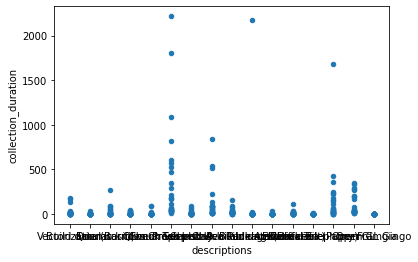

In [75]:
generate_collection_duration_report(total_df)

Predicted,False,True
Actual,,
False,126,2
True,260,60


Predicted,False,True
Actual,,
False,0.984375,0.015625
True,0.812500,0.187500


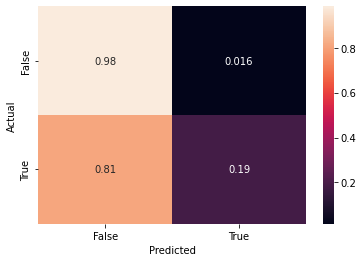

In [64]:
generate_confusion_metrics_report(total_df)

## Method discrimination

### Build Data

,descriptions,collected_data,emulator_detected,collection_duration,is_emulator
1,Build data (Basic),"{osVersion=25, model=ONEPLUS A5000, fingerprin...",False,4,True
10,Build data (Different),"{osVersion=25, model=ONEPLUS A5000, fingerprin...",False,1,True
12,Build data (Paper),"{osVersion=25, model=ONEPLUS A5000, fingerprin...",False,0,True
17,Build data (Basic),"{osVersion=25, model=ONEPLUS A5000, fingerprin...",False,2,True
26,Build data (Different),"{osVersion=25, model=ONEPLUS A5000, fingerprin...",False,0,True
...,...,...,...,...,...
426,Build data (Different),"{osVersion=29, model=Redmi Note 8, fingerprint...",False,0,False
428,Build data (Paper),"{osVersion=29, model=Redmi Note 8, fingerprint...",False,1,False
433,Build data (Basic),"{osVersion=27, model=MI PLAY, fingerprint=xiao...",False,4,False
442,Build data (Different),"{osVersion=27, model=MI PLAY, fingerprint=xiao...",False,1,False


Max Value: 33
Standard Deviation: 5.016324469928911
Mean Value: 2.4285714285714284
Median Value: 1.0


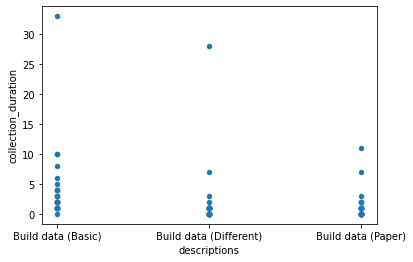

In [76]:
generate_collection_duration_report(filter_build_data(total_df))

Predicted,False,True
Actual,,
False,22,2
True,45,15


Predicted,False,True
Actual,,
False,0.916667,0.083333
True,0.750000,0.250000


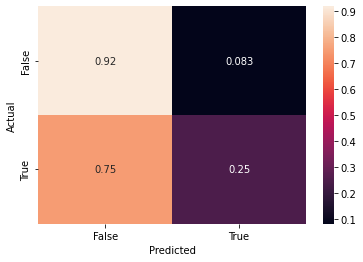

In [21]:
generate_confusion_metrics_report(filter_build_data(total_df))

### Emulator Files

,descriptions,collected_data,emulator_detected,collection_duration,is_emulator
2,Emulator files,{},False,5,True
11,External File,{Name=/storage/emulated/0/windows/BstSharedFol...,True,3,True
18,Emulator files,{},False,9,True
27,External File,{Name=/storage/emulated/0/windows/BstSharedFol...,True,12,True
34,Emulator files,{},False,50,True
43,External File,{Name=/storage/emulated/0/windows/BstSharedFol...,True,26,True
50,Emulator files,{},False,3,True
59,External File,{Name=/storage/emulated/0/windows/BstSharedFol...,True,1,True
66,Emulator files,{},False,4,True
75,External File,{Name=/storage/emulated/0/windows/BstSharedFol...,True,4,True


Max Value: 268
Standard Deviation: 41.68588474547454
Mean Value: 19.678571428571427
Median Value: 5.0


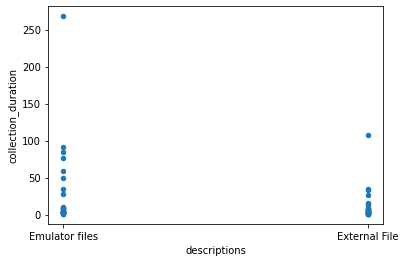

In [22]:
generate_collection_duration_report(filter_files(total_df))

Predicted,False,True
Actual,,
False,16,0
True,30,10


Predicted,False,True
Actual,,
False,1.00,0.00
True,0.75,0.25


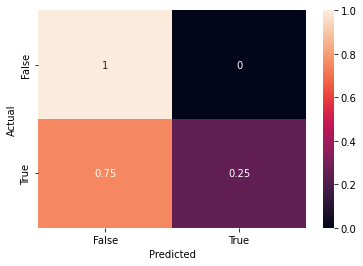

In [23]:
generate_confusion_metrics_report(filter_files(total_df))

### Telephony

,descriptions,collected_data,emulator_detected,collection_duration,is_emulator
5,Check Telephony,"{Phone Number=, Device ID=567294909334509, Net...",False,47,True
13,Check Telephony Framgia,"{Phone Number=, Device ID=567294909334509, Net...",False,15,True
21,Check Telephony,"{Phone Number=, Device ID=567294909334509, Net...",False,34,True
29,Check Telephony Framgia,"{Phone Number=, Device ID=567294909334509, Net...",False,32,True
37,Check Telephony,"{Phone Number=, Device ID=567294909334509, Net...",False,31,True
45,Check Telephony Framgia,"{Phone Number=, Device ID=567294909334509, Net...",False,16,True
53,Check Telephony,"{Phone Number=, Device ID=567294909334509, Net...",False,21,True
61,Check Telephony Framgia,"{Phone Number=, Device ID=567294909334509, Net...",False,14,True
69,Check Telephony,"{Phone Number=, Device ID=567294909334509, Net...",False,39,True
77,Check Telephony Framgia,"{Phone Number=, Device ID=567294909334509, Net...",False,18,True


Max Value: 2217
Standard Deviation: 453.9365079465996
Mean Value: 255.71428571428572
Median Value: 62.5


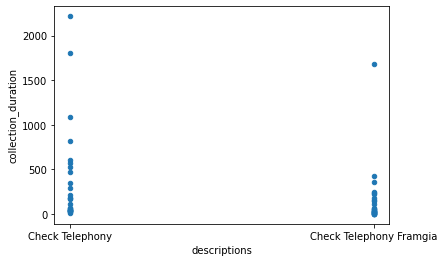

In [24]:
generate_collection_duration_report(filter_telephony(total_df))

Predicted,False,True
Actual,,
False,16,0
True,20,20


Predicted,False,True
Actual,,
False,1.0,0.0
True,0.5,0.5


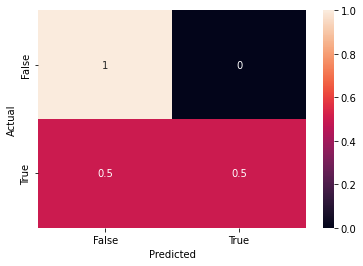

In [25]:
generate_confusion_metrics_report(filter_telephony(total_df))

### QEMU Drivers

,descriptions,collected_data,emulator_detected,collection_duration,is_emulator
3,Quemu known drivers,{},False,2,True
19,Quemu known drivers,{},False,1,True
35,Quemu known drivers,{},False,4,True
51,Quemu known drivers,{},False,0,True
67,Quemu known drivers,{},False,1,True
83,Quemu known drivers,{},False,38,True
99,Quemu known drivers,{},False,6,True
115,Quemu known drivers,{},False,27,True
131,Quemu known drivers,{},False,28,True
147,Quemu known drivers,{},False,9,True


Max Value: 44
Standard Deviation: 12.92141489787256
Mean Value: 9.0
Median Value: 2.0


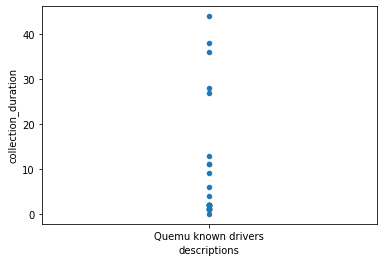

In [26]:
generate_collection_duration_report(filter_qemu_drivers(total_df))

Predicted,False
Actual,
False,8
True,20


Predicted,False
Actual,
False,1.0
True,1.0


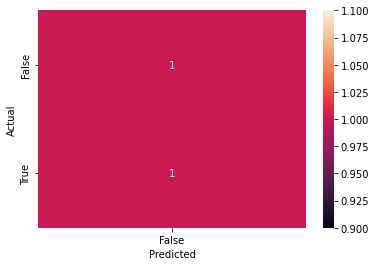

In [27]:
generate_confusion_metrics_report(filter_qemu_drivers(total_df))

### IP

,descriptions,collected_data,emulator_detected,collection_duration,is_emulator
6,Check IP,{Exception=java.io.IOException: Cannot run pro...,False,6,True
22,Check IP,{Exception=java.io.IOException: Cannot run pro...,False,13,True
38,Check IP,{Exception=java.io.IOException: Cannot run pro...,False,4,True
54,Check IP,{Exception=java.io.IOException: Cannot run pro...,False,3,True
70,Check IP,{Exception=java.io.IOException: Cannot run pro...,False,7,True
86,Check IP,{Exception=java.io.IOException: Cannot run pro...,False,42,True
102,Check IP,{Exception=java.io.IOException: Cannot run pro...,False,61,True
118,Check IP,{Exception=java.io.IOException: Cannot run pro...,False,92,True
134,Check IP,{Exception=java.io.IOException: Cannot run pro...,False,9,True
150,Check IP,{Exception=java.io.IOException: Cannot run pro...,False,33,True


Max Value: 92
Standard Deviation: 20.692636013451384
Mean Value: 13.5
Median Value: 5.5


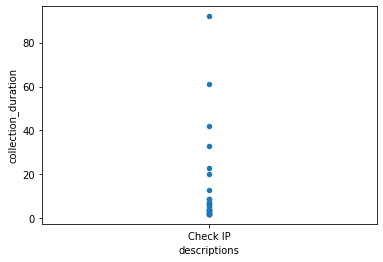

In [28]:
generate_collection_duration_report(filter_ip(total_df))

Predicted,False
Actual,
False,8
True,20


Predicted,False
Actual,
False,1.0
True,1.0


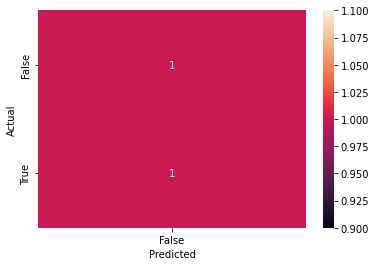

In [29]:
generate_confusion_metrics_report(filter_ip(total_df))

### Installed Packages

,descriptions,collected_data,emulator_detected,collection_duration,is_emulator
7,Check Installed Packages,{Suspect Packages=[]},False,15,True
23,Check Installed Packages,{Suspect Packages=[]},False,6,True
39,Check Installed Packages,{Suspect Packages=[]},False,13,True
55,Check Installed Packages,{Suspect Packages=[]},False,22,True
71,Check Installed Packages,{Suspect Packages=[]},False,11,True
87,Check Installed Packages,{Suspect Packages=[]},False,516,True
103,Check Installed Packages,{Suspect Packages=[]},False,541,True
119,Check Installed Packages,{Suspect Packages=[]},False,837,True
135,Check Installed Packages,{Suspect Packages=[]},False,218,True
151,Check Installed Packages,{Suspect Packages=[]},False,137,True


Max Value: 837
Standard Deviation: 194.81243183607046
Mean Value: 113.57142857142857
Median Value: 44.0


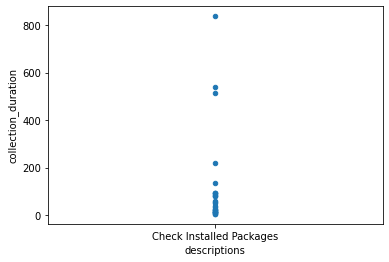

In [30]:
generate_collection_duration_report(filter_installed_packages(total_df))

Predicted,False,True
Actual,,
False,8,0
True,15,5


Predicted,False,True
Actual,,
False,1.00,0.00
True,0.75,0.25


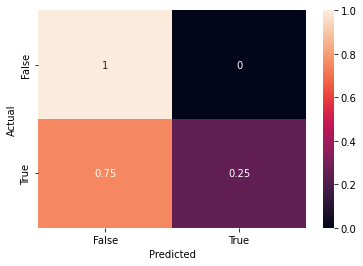

In [31]:
generate_confusion_metrics_report(filter_installed_packages(total_df))

### Available Activities

,descriptions,collected_data,emulator_detected,collection_duration,is_emulator
8,Suspect Available Activities,{Suspect Activities=[]},False,9,True
24,Suspect Available Activities,{Suspect Activities=[]},False,13,True
40,Suspect Available Activities,{Suspect Activities=[]},False,3,True
56,Suspect Available Activities,{Suspect Activities=[]},False,2,True
72,Suspect Available Activities,{Suspect Activities=[]},False,4,True
88,Suspect Available Activities,{Suspect Activities=[]},False,84,True
104,Suspect Available Activities,{Suspect Activities=[]},False,44,True
120,Suspect Available Activities,{Suspect Activities=[]},False,160,True
136,Suspect Available Activities,{Suspect Activities=[]},False,74,True
152,Suspect Available Activities,{Suspect Activities=[]},False,23,True


Max Value: 160
Standard Deviation: 33.44590119698237
Mean Value: 26.964285714285715
Median Value: 16.5


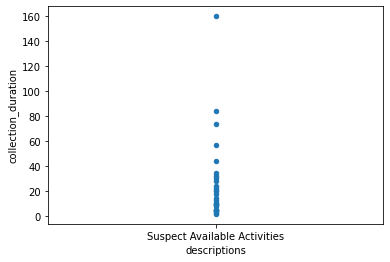

In [32]:
generate_collection_duration_report(filter_available_activities(total_df))

Predicted,False
Actual,
False,8
True,20


Predicted,False
Actual,
False,1.0
True,1.0


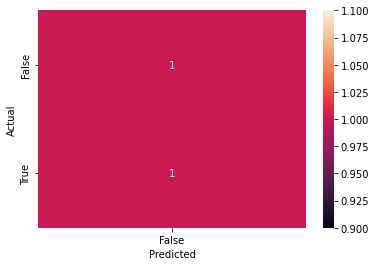

In [33]:
generate_confusion_metrics_report(filter_available_activities(total_df))

### Filter Services

,descriptions,collected_data,emulator_detected,collection_duration,is_emulator
9,Check Running Services,{Suspect Running Services=[]},False,3,True
25,Check Running Services,{Suspect Running Services=[]},False,2,True
41,Check Running Services,{Suspect Running Services=[]},False,0,True
57,Check Running Services,{Suspect Running Services=[]},False,10,True
73,Check Running Services,{Suspect Running Services=[]},False,1,True
89,Check Running Services,{Suspect Running Services=[]},False,1,True
105,Check Running Services,{Suspect Running Services=[]},False,2175,True
121,Check Running Services,{Suspect Running Services=[]},False,15,True
137,Check Running Services,{Suspect Running Services=[]},False,2,True
153,Check Running Services,{Suspect Running Services=[]},False,1,True


Max Value: 2175
Standard Deviation: 410.3469479901949
Mean Value: 81.39285714285714
Median Value: 2.0


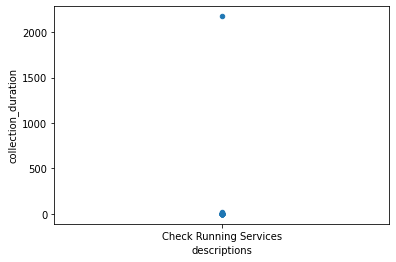

In [34]:
generate_collection_duration_report(filter_services(total_df))

Predicted,False
Actual,
False,8
True,20


Predicted,False
Actual,
False,1.0
True,1.0


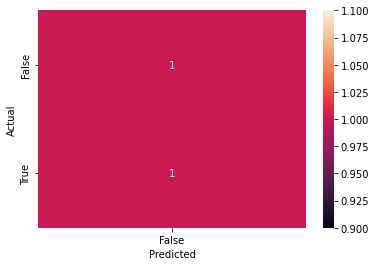

In [35]:
generate_confusion_metrics_report(filter_services(total_df))

### OpenGL

,descriptions,collected_data,emulator_detected,collection_duration,is_emulator
14,Open GL,{openGLRender=Adreno (TM) 540},False,41,True
30,Open GL,{openGLRender=Adreno (TM) 540},False,40,True
46,Open GL,{openGLRender=Adreno (TM) 540},False,38,True
62,Open GL,{openGLRender=Adreno (TM) 540},False,53,True
78,Open GL,{openGLRender=Adreno (TM) 540},False,38,True
94,Open GL,{openGLRender=Android Emulator OpenGL ES Trans...,True,170,True
110,Open GL,{openGLRender=Android Emulator OpenGL ES Trans...,True,273,True
126,Open GL,{openGLRender=Android Emulator OpenGL ES Trans...,True,333,True
142,Open GL,{openGLRender=Android Emulator OpenGL ES Trans...,True,199,True
158,Open GL,{openGLRender=Android Emulator OpenGL ES Trans...,True,80,True


Max Value: 345
Standard Deviation: 113.19292773353328
Mean Value: 102.25
Median Value: 38.0


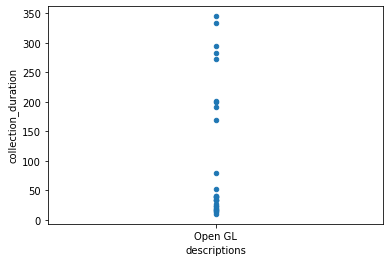

In [78]:
generate_collection_duration_report(filter_openGL(total_df))

Predicted,False,True
Actual,,
False,8,0
True,10,10


Predicted,False,True
Actual,,
False,1.0,0.0
True,0.5,0.5


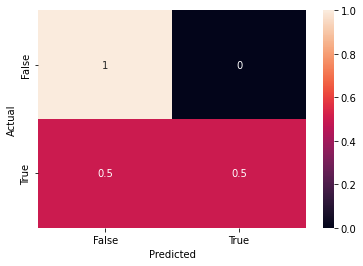

In [79]:
generate_confusion_metrics_report(filter_openGL(total_df))

### Vectorization

,descriptions,collected_data,emulator_detected,collection_duration,is_emulator
0,Vectorization,"{ABI=x86_64, isEmu=-1}",False,4,True
16,Vectorization,"{ABI=x86_64, isEmu=-1}",False,7,True
32,Vectorization,"{ABI=x86_64, isEmu=-1}",False,15,True
48,Vectorization,"{ABI=x86_64, isEmu=-1}",False,3,True
64,Vectorization,"{ABI=x86_64, isEmu=-1}",False,2,True
80,Vectorization,"{ABI=x86_64, isEmu=-1}",False,35,True
96,Vectorization,"{ABI=x86_64, isEmu=-1}",False,171,True
112,Vectorization,"{ABI=x86_64, isEmu=-1}",False,133,True
128,Vectorization,"{ABI=x86_64, isEmu=-1}",False,2,True
144,Vectorization,"{ABI=x86_64, isEmu=-1}",False,9,True


Max Value: 179
Standard Deviation: 49.04499338017465
Mean Value: 25.321428571428573
Median Value: 6.5


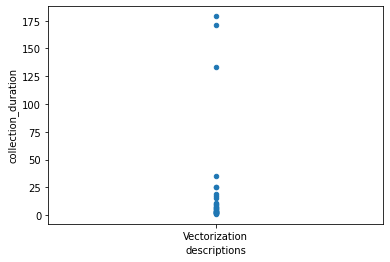

In [38]:
generate_collection_duration_report(filter_vectorization(total_df))

Predicted,False
Actual,
False,8
True,20


Predicted,False
Actual,
False,1.0
True,1.0


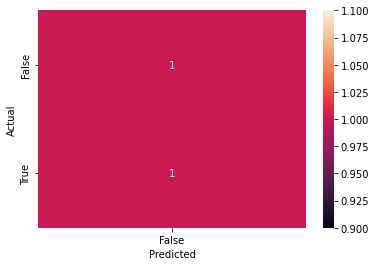

In [39]:
generate_confusion_metrics_report(filter_vectorization(total_df))

## Bluestack Detection

Methods that were able to detect emulator

In [40]:
bluestacks_detected_methods = emulator_detected_data_frame(bluestacks_df, bluestacks_log_count)
bluestacks_detected_methods

,detection_count,log_count,detection_percentage
External File,5,5,100.0
Build data (Paper),5,5,100.0


Cleaning up wrong heuristic

In [41]:
bluestacks_df['emulator_detected'] = bluestacks_df.apply(lambda row: fix_emulator_build_data(row), axis=1)
bluestacks_detected_methods = emulator_detected_data_frame(bluestacks_df, bluestacks_log_count)
bluestacks_detected_methods

,detection_count,log_count,detection_percentage
External File,5,5,100.0


## Android Studio Detection

Methods that were able to detect emulator

In [42]:
android_studio_detected_methods = emulator_detected_data_frame(android_studio_df, android_studio_log_count)
android_studio_detected_methods

,detection_count,log_count,detection_percentage
Emulator files,5,5,100.0
Check Telephony,5,5,100.0
Build data (Paper),5,5,100.0
Check Telephony Framgia,5,5,100.0
Open GL,5,5,100.0


Cleaning up wrong heuristic

In [43]:
android_studio_df['emulator_detected'] = android_studio_df.apply(lambda row: fix_emulator_build_data(row), axis=1)
android_studio_detected_methods = emulator_detected_data_frame(android_studio_df, android_studio_log_count)
android_studio_detected_methods

,detection_count,log_count,detection_percentage
Emulator files,5,5,100.0
Check Telephony,5,5,100.0
Build data (Paper),5,5,100.0
Check Telephony Framgia,5,5,100.0
Open GL,5,5,100.0


## Genymotion Detection

Methods that were able to detect emulator

In [44]:
genymotion_detected_methods = emulator_detected_data_frame(genymotion_df, genymotion_log_count)
genymotion_detected_methods

,detection_count,log_count,detection_percentage
Build data (Basic),5,5,100.0
Check Telephony,5,5,100.0
Check Installed Packages,5,5,100.0
Build data (Paper),5,5,100.0
Check Telephony Framgia,5,5,100.0
Open GL,5,5,100.0


Cleaning up wrong heuristic

In [45]:
genymotion_df['emulator_detected'] = genymotion_df.apply(lambda row: fix_emulator_build_data(row), axis=1)
genymotion_detected_methods = emulator_detected_data_frame(genymotion_df, genymotion_log_count)
genymotion_detected_methods

,detection_count,log_count,detection_percentage
Build data (Basic),5,5,100.0
Check Telephony,5,5,100.0
Check Installed Packages,5,5,100.0
Build data (Paper),5,5,100.0
Check Telephony Framgia,5,5,100.0
Open GL,5,5,100.0


## Nox Detecion

Methods that were able to detect emulator

In [46]:
nox_detected_methods = emulator_detected_data_frame(nox_df, nox_log_count)
nox_detected_methods

,detection_count,log_count,detection_percentage
Build data (Paper),5,5,100.0


Cleaning up wrong heuristic

In [47]:
nox_df['emulator_detected'] = nox_df.apply(lambda row: fix_emulator_build_data(row), axis=1)
nox_detected_methods = emulator_detected_data_frame(nox_df, nox_log_count)
nox_detected_methods

,detection_count,log_count,detection_percentage


## Real Devices

False positives

In [48]:
real_devices_detected_methods = emulator_detected_data_frame(real_devices_df, real_devices_log_count)
real_devices_detected_methods

,detection_count,log_count,detection_percentage
Build data (Paper),8,8,100.0


Cleaning up wrong heuristic, cleaned up the high false positives number

In [49]:
real_devices_df['emulator_detected'] = real_devices_df.apply(lambda row: fix_emulator_build_data(row), axis=1)
real_devices_detected_methods = emulator_detected_data_frame(real_devices_df, real_devices_log_count)
real_devices_detected_methods

,detection_count,log_count,detection_percentage
Build data (Paper),2,8,25.0
